# 과제1 - 지하철 이용승객 분석 EDA 숙제
1. 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까?(기준: 승하차총승객수)
2. 가설)1월~6월 중에 5월에 지하철 승객수가 많다?(기준: 승하차총승객수)
3. 가설) 요일 중에서 목요일에 지하철 승객수가 많다?(기준: 승하차총승객수)
4. 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요?(pointplot)
5. 가장 승객이 많이 타는 승차역은?
6. 노선별로 역별/요일별 승차승객수를 비교해볼 수 있을까?(1~9호선, 역별/요일별 heatmap)
7. 1호선에서 가장 하차를 많이 하는 역은?(groupby)
8. 2호선에서 어느 역에서 승차가 가장 많이 발생할까?(Folium역 표시)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.getcwd()

'/Users/unhi/Desktop/3-2/AI+X/010.지하철 이용승객 EDA분석_숙제_20220914/실습'

In [4]:
file = r'./rawfiles/CARD_SUBWAY_MONTH_201901.csv'

pd.read_csv(file)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [5]:
raw = pd.read_csv(file)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


In [7]:
files = os.listdir('rawfiles')
files

['.DS_Store',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201906.csv',
 '.ipynb_checkpoints']

In [8]:
files.pop(0)
files.pop(-1)
files

['CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [9]:
dirpath = './rawfiles/'
raw = pd.DataFrame()
for file in files:
    temp = pd.read_csv(dirpath+file)
    raw = pd.concat([raw, temp], axis=0)
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107028 entries, 0 to 17723
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
raw = raw.reset_index(drop=True)
# 인덱스를 처음부터 재배열해줌
raw.head(7)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190301,4호선,서울역,62588.0,64794.0,20190304
1,20190301,1호선,신설동,1335.0,1375.0,20190304
2,20190301,6호선,보문,1208.0,1271.0,20190304
3,20190301,4호선,성신여대입구,3231.0,3650.0,20190304
4,20190301,우이신설경전철,정릉,3620.0,2869.0,20190304
5,20190301,우이신설경전철,북한산보국문,4957.0,4124.0,20190304
6,20190301,우이신설경전철,솔샘,4224.0,3614.0,20190304


# 요일추가

In [11]:
raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [12]:
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-03-01,4호선,서울역,62588.0,64794.0,20190304
1,2019-03-01,1호선,신설동,1335.0,1375.0,20190304
2,2019-03-01,6호선,보문,1208.0,1271.0,20190304
3,2019-03-01,4호선,성신여대입구,3231.0,3650.0,20190304
4,2019-03-01,우이신설경전철,정릉,3620.0,2869.0,20190304


In [13]:
raw['요일']=raw['사용일자'].dt.dayofweek
raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6
107027,2019-06-30,6호선,태릉입구,5730.0,5214.0,20190703,6


In [14]:
cov={
    0:'일',
    1:'월',
    2:'화',
    3:'수',
    4:'목',
    5:'금',
    6:'토'
}

In [15]:
raw['요일']=raw['요일'].map(cov)
raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,토
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,토
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,토
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,토
107027,2019-06-30,6호선,태릉입구,5730.0,5214.0,20190703,토


# '연월', '월일' 컬럼 추가

In [16]:
raw['연월'] = raw['사용일자'].dt.strftime('%Y-%m')
raw['월일'] = raw['사용일자'].dt.strftime('%m-%d')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-03-01,4호선,서울역,62588.0,64794.0,20190304,목,2019-03,03-01
1,2019-03-01,1호선,신설동,1335.0,1375.0,20190304,목,2019-03,03-01
2,2019-03-01,6호선,보문,1208.0,1271.0,20190304,목,2019-03,03-01
3,2019-03-01,4호선,성신여대입구,3231.0,3650.0,20190304,목,2019-03,03-01
4,2019-03-01,우이신설경전철,정릉,3620.0,2869.0,20190304,목,2019-03,03-01


# 승하차총승객수 추가

In [17]:
raw['승하차총승객수'] = raw['승차총승객수']+raw['하차총승객수']
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일,승하차총승객수
0,2019-03-01,4호선,서울역,62588.0,64794.0,20190304,목,2019-03,03-01,127382.0
1,2019-03-01,1호선,신설동,1335.0,1375.0,20190304,목,2019-03,03-01,2710.0
2,2019-03-01,6호선,보문,1208.0,1271.0,20190304,목,2019-03,03-01,2479.0
3,2019-03-01,4호선,성신여대입구,3231.0,3650.0,20190304,목,2019-03,03-01,6881.0
4,2019-03-01,우이신설경전철,정릉,3620.0,2869.0,20190304,목,2019-03,03-01,6489.0


In [18]:
raw = raw[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-03-01,목,4호선,서울역,62588.0,64794.0,127382.0,2019-03,03-01,20190304
1,2019-03-01,목,1호선,신설동,1335.0,1375.0,2710.0,2019-03,03-01,20190304
2,2019-03-01,목,6호선,보문,1208.0,1271.0,2479.0,2019-03,03-01,20190304
3,2019-03-01,목,4호선,성신여대입구,3231.0,3650.0,6881.0,2019-03,03-01,20190304
4,2019-03-01,목,우이신설경전철,정릉,3620.0,2869.0,6489.0,2019-03,03-01,20190304


# 정리한 데이터 저장

In [19]:
fpath = './subway_raw.csv'
raw.to_csv(fpath, index=False, encoding='utf-8-sig')

# 1. 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까?(기준: 승하차총승객수)
# 2. 가설)1월~6월 중에 5월에 지하철 승객수가 많다?(기준: 승하차총승객수)

In [20]:
file1 = r'./subway_raw.csv'
sub = pd.read_csv(file1)
sub

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-03-01,목,4호선,서울역,62588.0,64794.0,127382.0,2019-03,03-01,20190304
1,2019-03-01,목,1호선,신설동,1335.0,1375.0,2710.0,2019-03,03-01,20190304
2,2019-03-01,목,6호선,보문,1208.0,1271.0,2479.0,2019-03,03-01,20190304
3,2019-03-01,목,4호선,성신여대입구,3231.0,3650.0,6881.0,2019-03,03-01,20190304
4,2019-03-01,목,우이신설경전철,정릉,3620.0,2869.0,6489.0,2019-03,03-01,20190304
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,토,7호선,마들,6622.0,6116.0,12738.0,2019-06,06-30,20190703
107024,2019-06-30,토,4호선,노원,14071.0,14702.0,28773.0,2019-06,06-30,20190703
107025,2019-06-30,토,7호선,중계,9516.0,8981.0,18497.0,2019-06,06-30,20190703
107026,2019-06-30,토,7호선,하계,11645.0,11121.0,22766.0,2019-06,06-30,20190703


In [21]:
submonth = sub.groupby('연월')[['승하차총승객수']].sum()
submonth[submonth['승하차총승객수']==submonth['승하차총승객수'].max()]
# submonth.sort_values(ascending=False) 내림차순으로 구하는 방법도 있음

,승하차총승객수
연월,
2019-05,485718557.0


---
*'연월'로 그룹핑하여, 승하차총승객수의 합을 구했다.<br/>
이때 승하차총승객수가 최대가 되는 연월은 __'2019-05'__이므로 __5월__에 지하철 승객수가 가장 많다*


---

# 3. 가설) 요일 중에서 목요일에 지하철 승객수가 많다?(기준: 승하차총승객수)

In [22]:
subday = sub.groupby('요일')[['승하차총승객수']].sum()
subday[subday['승하차총승객수']==subday['승하차총승객수'].max()]

,승하차총승객수
요일,
목,445310717.0


---
*'요일'로 그룹핑하여, 승하차총승객수의 합을 구했다.<br/>
이때 승하차총승객수가 최대가 되는 요일은 __'목'__이므로 __목요일__에 지하철 승객수가 가장 많다.*

---

# 4. 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요?(pointplot)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

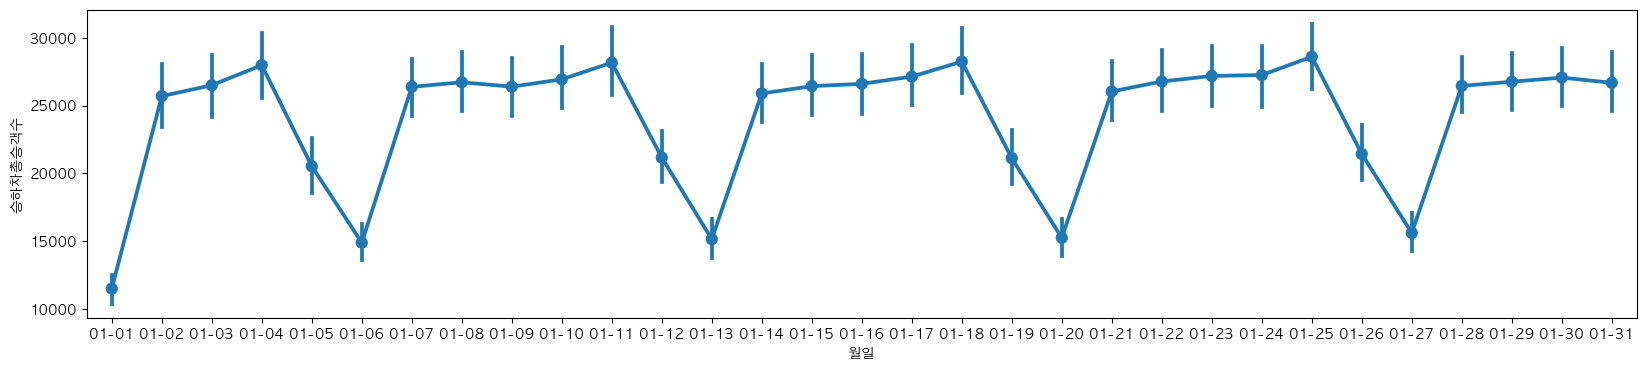

In [24]:
submonth1=sub[sub['연월']=='2019-01']
plt.figure(figsize=(20, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
sns.pointplot(x='월일', y='승하차총승객수', data=submonth1)

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

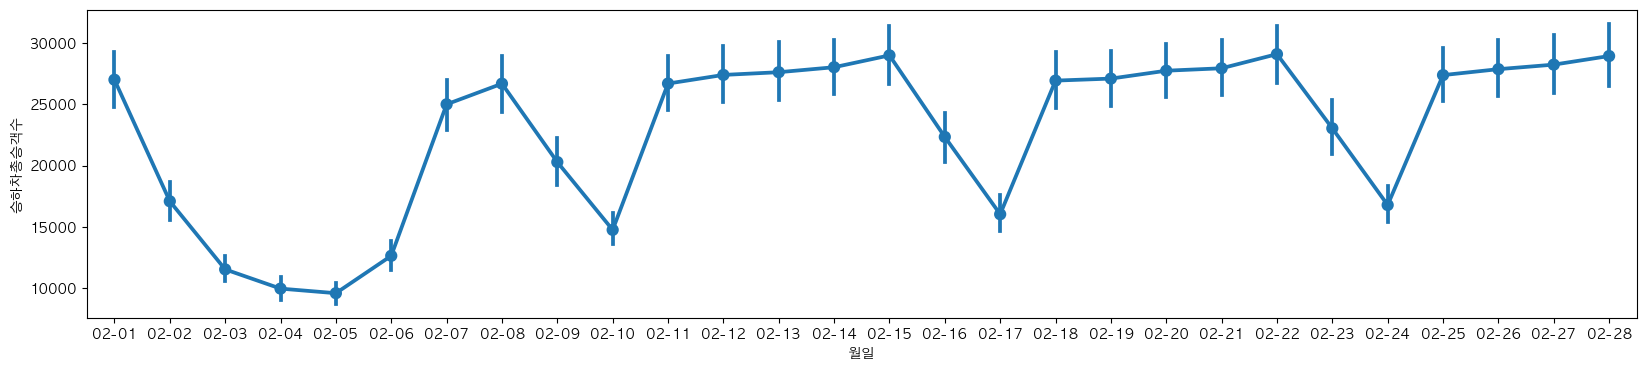

In [25]:
submonth2=sub[sub['연월']=='2019-02']
plt.figure(figsize=(20, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
sns.pointplot(x='월일', y='승하차총승객수', data=submonth2)

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

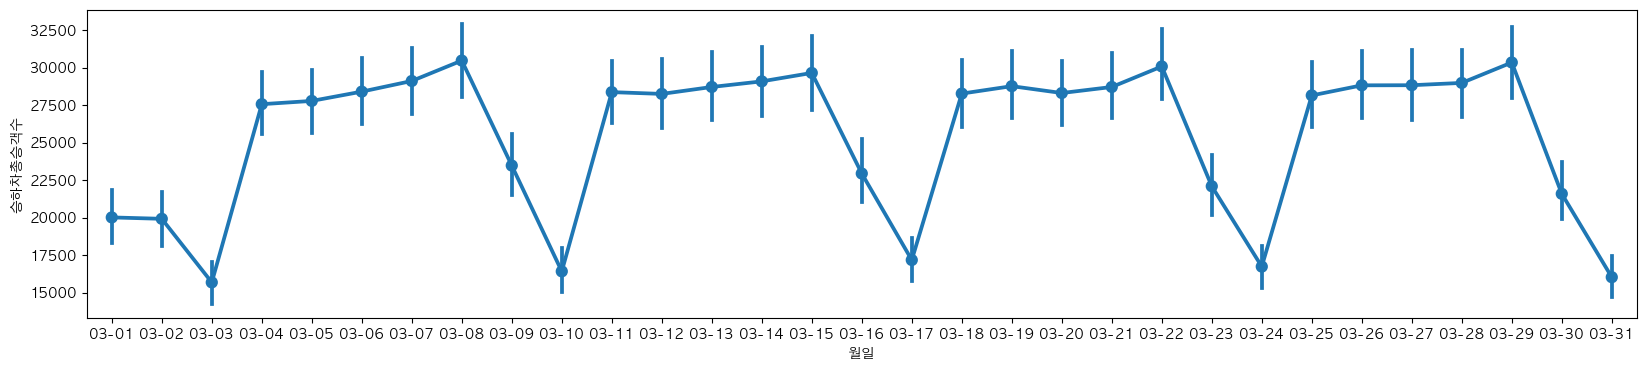

In [26]:
submonth3=sub[sub['연월']=='2019-03']
plt.figure(figsize=(20, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
sns.pointplot(x='월일', y='승하차총승객수', data=submonth3)

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

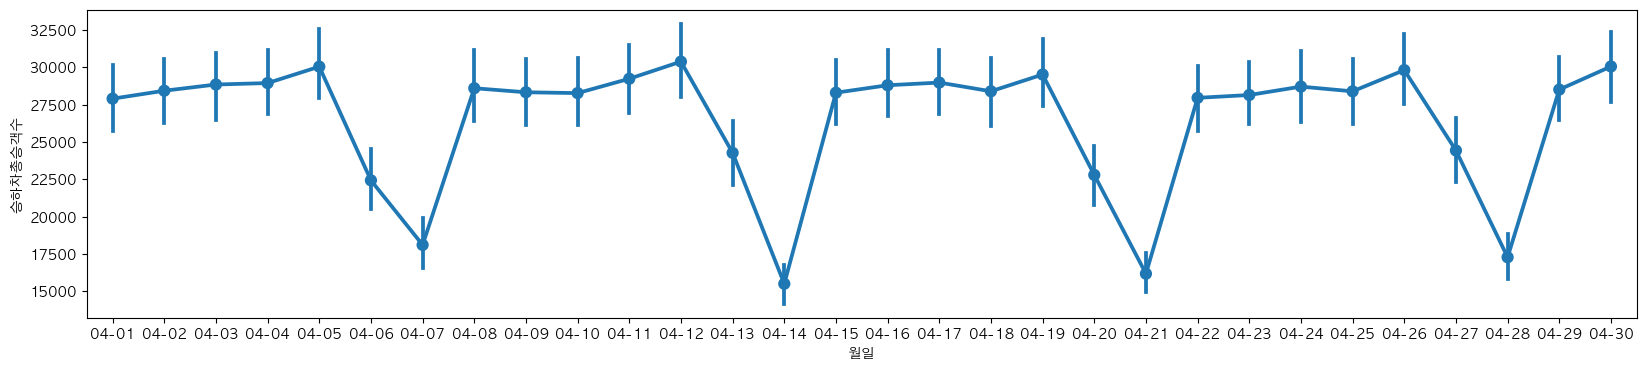

In [27]:
submonth4=sub[sub['연월']=='2019-04']
plt.figure(figsize=(20, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
sns.pointplot(x='월일', y='승하차총승객수', data=submonth4)

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

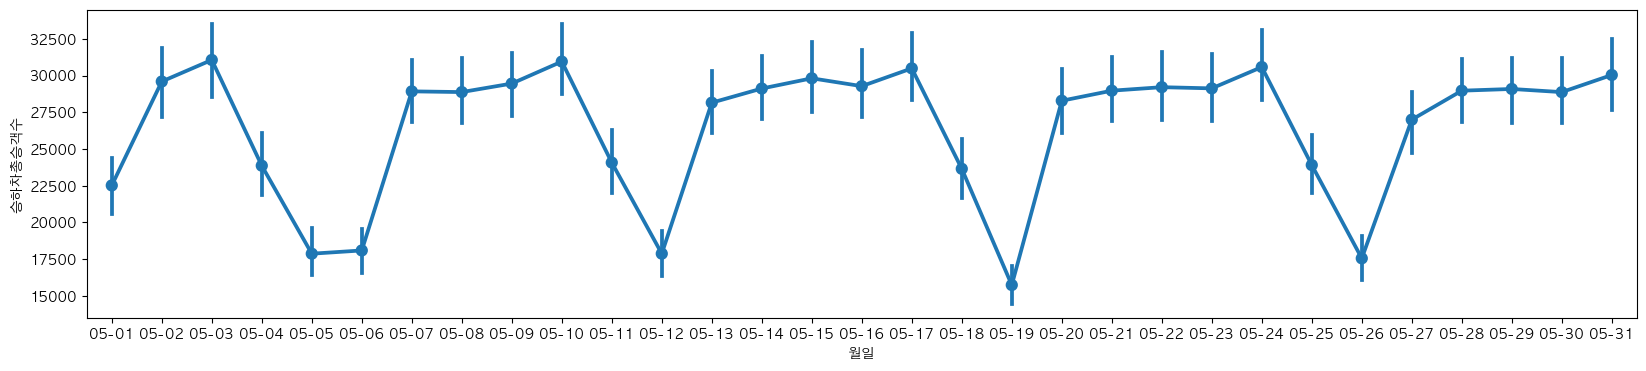

In [28]:
submonth5=sub[sub['연월']=='2019-05']
plt.figure(figsize=(20, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
sns.pointplot(x='월일', y='승하차총승객수', data=submonth5)

<AxesSubplot: xlabel='월일', ylabel='승하차총승객수'>

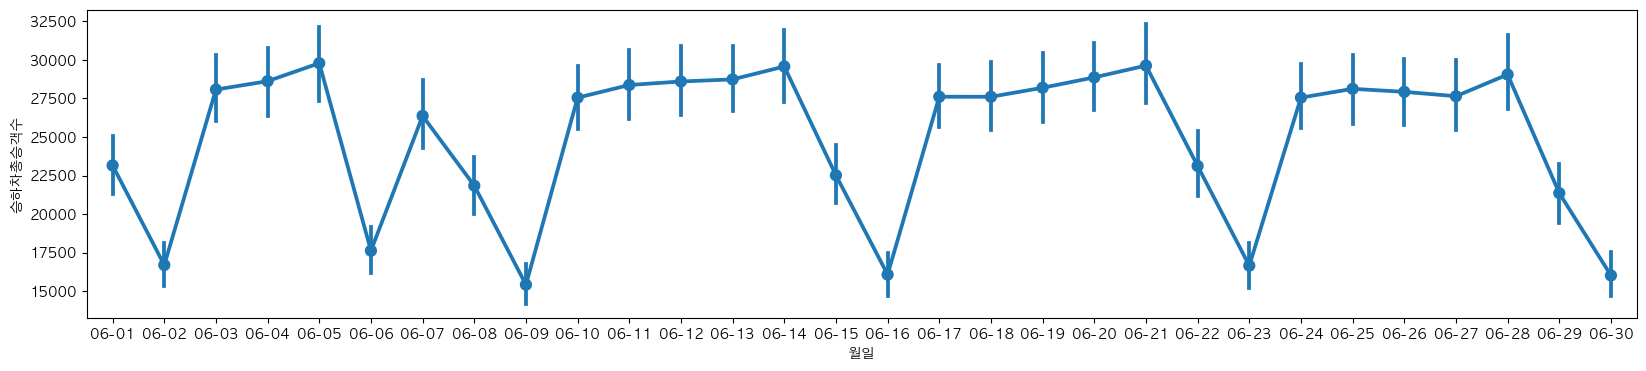

In [29]:
submonth6=sub[sub['연월']=='2019-06']
plt.figure(figsize=(20, 4)) 
plt.rcParams['font.family'] = 'AppleGothic'
sns.pointplot(x='월일', y='승하차총승객수', data=submonth6)

# 5. 가장 승객이 많이 타는 승차역은?

In [30]:
substa = sub.groupby('역명')[['승차총승객수']].sum()
substa[substa['승차총승객수']==substa['승차총승객수'].max()]

,승차총승객수
역명,
잠실,18574323.0


---
*'역명'으로 그룹핑하여, 승차총승객수의 합을 구했다.<br/>
이때 승차총승객수가 최대가 되는 역은 __'잠실'__이므로 __'잠실'__에서 승객이 가장 많이 탄다.*

___

# 6. 노선별로 역별/요일별 승차승객수를 비교해볼 수 있을까?(1~9호선, 역별/요일별 heatmap)

In [31]:
sub1=sub[sub['노선명']=='1호선']
df1 = sub1.groupby(['역명', '요일'])[['승차총승객수']].sum()
df1 = pd.pivot_table(data=df1, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')

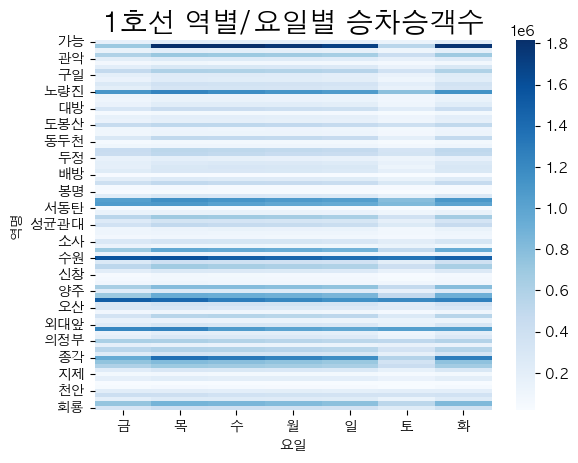

In [32]:
sns.heatmap(df1, cmap='Blues')
plt.title('1호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

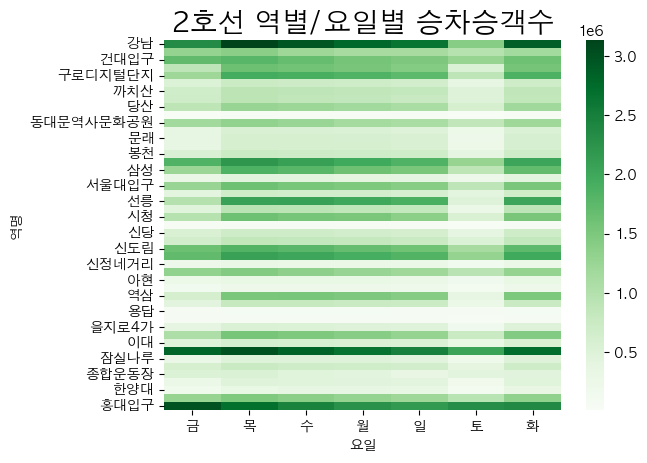

In [33]:
sub2 = sub[sub['노선명']=='2호선']
df2 = sub2.groupby(['역명', '요일'])[['승차총승객수']].sum()
df2 = pd.pivot_table(data=df2, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df2, cmap='Greens')
plt.title('2호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

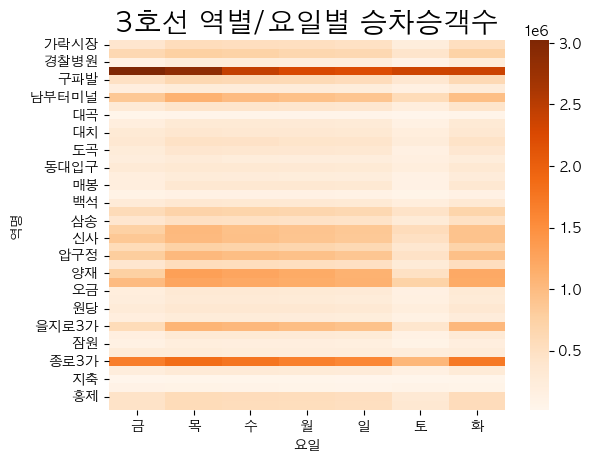

In [34]:
sub3 = sub[sub['노선명']=='3호선']
df3 = sub3.groupby(['역명', '요일'])[['승차총승객수']].sum()
df3 = pd.pivot_table(data=df3, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df3, cmap='Oranges')
plt.title('3호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

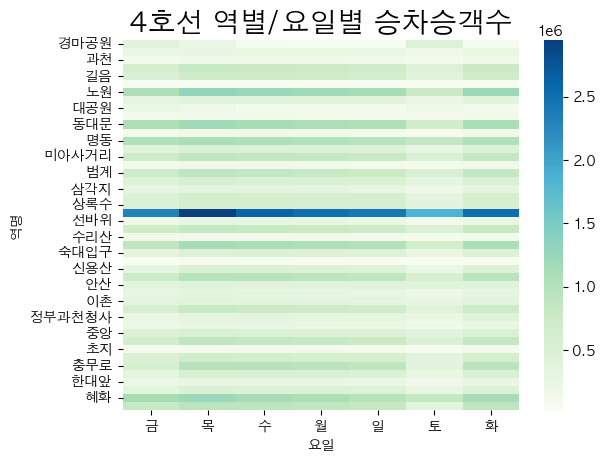

In [35]:
sub4 = sub[sub['노선명']=='4호선']
df4 = sub4.groupby(['역명', '요일'])[['승차총승객수']].sum()
df4 = pd.pivot_table(data=df4, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df4, cmap='GnBu')
plt.title('4호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

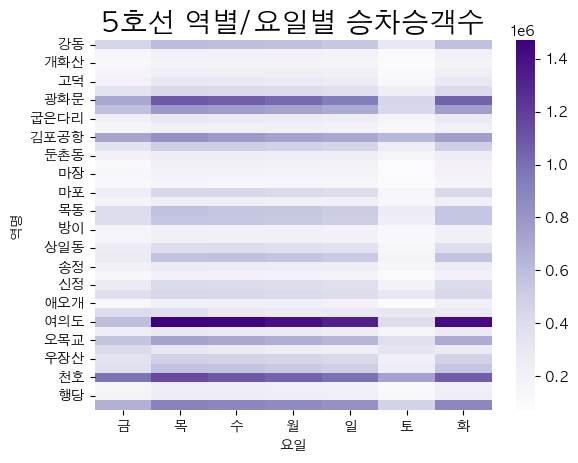

In [36]:
sub5 = sub[sub['노선명']=='5호선']
df5 = sub5.groupby(['역명', '요일'])[['승차총승객수']].sum()
df5 = pd.pivot_table(data=df5, index='역명', columns='요일', values='승차총승객수', aggfunc='sum')
ax=sns.heatmap(df5, cmap='Purples')
plt.title('5호선 역별/요일별 승차승객수', fontsize=20)
plt.show()

# 7. 1호선에서 가장 하차를 많이 하는 역은?(groupby)

In [37]:
sub1 = sub[sub['노선명']=='1호선']
sub1_hacha = sub1.groupby('역명')[['하차총승객수']].sum()
sub1_hacha[sub1_hacha['하차총승객수']==sub1_hacha['하차총승객수'].max()]

,하차총승객수
역명,
가산디지털단지,10571381.0


---
*'노선명'이 '1호선'인 행을 추출하여 sub1에 넣어줬다. <br/> sub1에서 '역명'으로 그룹핑하여, 하차총승객수의 합을 구했다. <br/>
이때 하차총승객수가 최대가 되는 역은 '가산디지털단지'이므로 __'가산디지털단지'__에서 승객이 가장 많이 내린다.*
___

# 8. 2호선에서 어느 역에서 승차가 가장 많이 발생할까?(Folium역 표시)

In [38]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [39]:
file2 = r'./지하철노선위경도정보2.csv'
locations = pd.read_csv(file2)

# 모든 지하철역 지도표시
m = folium.Map(location=[locations.head(1)['위도'], locations.head(1)['경도']],
               zoom_start=10, 
               width=750, 
               height=500
              )
for i in range(len(locations)):
    latitude = locations.at[i,'위도']
    longitude = locations.at[i,'경도']
    name = locations.at[i,'역이름']
    folium.Marker([latitude, longitude],
                  popup=name,
                  tooltip=name).add_to(m)
m

In [40]:
#2호선 지하철 표시
locations2 = locations[locations['호선']=='2호선']
locations2 = locations2.reset_index(drop=False)

m2 = folium.Map(location=[sub2_seungcha.head(1)['위도'], sub2_seungcha.head(1)['경도']],
               zoom_start=11, 
               width=750, 
               height=500
               )
for i in range(len(sub2_seungcha)):
    latitude = sub2_seungcha.at[i,'위도']
    longitude = sub2_seungcha.at[i,'경도']
    name = sub2_seungcha.at[i,'역이름']
    folium.Marker([latitude, longitude],
                  popup=name,
                  tooltip=name).add_to(m2)

NameError: name 'sub2_seungcha' is not defined

In [ ]:
sub2 = sub[sub['노선명']=='2호선']
sub2=sub2.rename(columns={'역명':'역이름'})
sub2_seungcha = sub2.groupby('역이름')[['승차총승객수']].sum()

sub2_seungcha = pd.merge(sub2_seungcha, locations2, on='역이름')
sub2_seungcha.head(2)

In [ ]:
m2.add_child(plugins.HeatMap(zip(sub2_seungcha['위도'],
                             sub2_seungcha['경도'],
                             sub2_seungcha['승차총승객수']), radius=18))
m2